### Proyecto Data Science 1 - CoderHouse
# Retención de estudiantes


## Abstract

Este proyecto se enfoca en entender los factores que influyen en la retención de estudiantes en la educación superior. Para esto, usamos un conjunto de datos de Kaggle que contiene información de más de 4.000 estudiantes universitarios. Este dataset es bastante completo, incluyendo datos académicos, socioeconómicos y demográficos. La variable principal que analizamos clasifica a los estudiantes en tres estados: **Graduado, Abandonó o Inscripto**, lo que nos permite estudiar los patrones relacionados con el éxito o la continuidad académica.

El objetivo de este estudio es identificar posibles correlaciones entre las características individuales de los estudiantes y su permanencia en el sistema educativo. Buscamos comprender qué factores —como la edad, la nacionalidad, el nivel educativo de los padres o el tipo de carrera— podrían estar asociados al abandono, y cuáles, por el contrario, podrían indicar una mayor probabilidad de que el estudiante se gradúe.

---


## Importación de librerías



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de datos

---
##### Aclaración importante: al dataset base, se suman varios dataset con mapeos para distintas categorías.
---

In [76]:
df_main = pd.read_csv("dataset.csv")

df_marital_status = pd.read_csv("tA1_marital_status.csv")
df_nationality = pd.read_csv("tA2_nationality.csv")
df_application_mode = pd.read_csv("tA3_application_mode.csv")
df_course_names = pd.read_csv("tA4_course_names.csv")
df_previous_quals = pd.read_csv("tA5_previous_quals.csv")
df_parent_previous_quals = pd.read_csv("tA6_parent_previous_quals.csv")
df_parent_occupation = pd.read_csv("tA7_parent_occupation.csv")
df_gender = pd.read_csv("tA8_gender.csv")
df_attendance_regime = pd.read_csv("tA9_attendance_regime.csv")

## Unión de datasets

In [41]:
df_main = df_main.merge(df_marital_status, left_on="Marital status", right_on="ID", how="left")
df_main['Marital status'] = df_main['Marital_Status']
df_main = df_main.drop(columns=['Marital_Status', 'ID'])

df_main = df_main.merge(df_nationality, left_on="Nacionality", right_on="ID", how="left")
df_main['Nacionality'] = df_main['Nationality']
df_main = df_main.drop(columns=['Nacionality', 'ID'])

df_main = df_main.merge(df_application_mode, left_on="Application mode", right_on="ID", how="left")
df_main['Application mode'] = df_main['App_Mode']
df_main = df_main.drop(columns=['App_Mode', 'ID'])

df_main = df_main.merge(df_course_names, left_on="Course", right_on="ID", how="left")
df_main['Course'] = df_main['Course_Name']
df_main = df_main.drop(columns=['Course_Name', 'ID'])

df_main = df_main.merge(df_previous_quals, left_on="Previous qualification", right_on="ID", how="left")
df_main['Previous qualification'] = df_main['Previous_Qual']
df_main = df_main.drop(columns=['Previous_Qual', 'ID'])

df_main = df_main.merge(df_parent_previous_quals, left_on="Mother's qualification", right_on="ID", how="left")
df_main["Mother's qualification"] = df_main['Parent_Qual']
df_main = df_main.drop(columns=['Parent_Qual', 'ID'])

df_main = df_main.merge(df_parent_previous_quals, left_on="Father's qualification", right_on="ID", how="left")
df_main["Father's qualification"] = df_main['Parent_Qual']
df_main = df_main.drop(columns=['Parent_Qual', 'ID'])

df_main = df_main.merge(df_parent_occupation, left_on="Mother's occupation", right_on="ID", how="left")
df_main["Mother's occupation"] = df_main['Occupation']
df_main = df_main.drop(columns=['Occupation', 'ID'])

df_main = df_main.merge(df_parent_occupation, left_on="Father's occupation", right_on="ID", how="left")
df_main["Father's occupation"] = df_main['Occupation']
df_main = df_main.drop(columns=['Occupation', 'ID'])

df_main = df_main.merge(df_gender, left_on="Gender", right_on="ID", how="left")
df_main['Gender'] = df_main['Gender_y']
df_main = df_main.drop(columns=['Gender_y', 'Gender_x', 'ID'])

df_main = df_main.merge(df_attendance_regime, left_on="Daytime/evening attendance", right_on="ID", how="left")
df_main['Daytime/evening attendance'] = df_main['Attendance_Regime']
df_main = df_main.drop(columns=['Attendance_Regime', 'ID'])

## Primer vistazo a los datos

In [42]:
print("Primeras 5 filas del DataFrame:")
print(df_main.head())

print("\nInformación general del DataFrame:")
df_main.info()

print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df_main.describe())

Primeras 5 filas del DataFrame:
  Marital status                  Application mode  Application order  \
0         Single      2nd phase—general contingent                  5   
1         Single  International student (bachelor)                  1   
2         Single      1st phase—general contingent                  5   
3         Single      2nd phase—general contingent                  2   
4        Married                 Over 23 years old                  1   

                                Course Daytime/evening attendance  \
0      Animation and Multimedia Design                    Daytime   
1                              Tourism                    Daytime   
2                 Communication Design                    Daytime   
3         Journalism and Communication                    Daytime   
4  Social Service (evening attendance)                    Evening   

  Previous qualification                             Mother's qualification  \
0    Secondary education           

## Preguntas e hipotesis de interés

#### Preguntas de Investigación:
1. ¿Existe alguna relación entre el nivel educativo de los padres y el egreso?
2. ¿El tipo de curso influye en la retención?
3. ¿Hay diferencias por género o nacionalidad?

#### Hipótesis a Probar:
- H1: Los estudiantes con padres con menor nivel educativo tienen más probabilidades de abandonar.
- H2: Existen diferencias significativas en las tasas de graduación entre las distintas disciplinas o programas académicos.
- H3: La nacionalidad local (portuguesa) está asociada a mayor retención.

## Elementos a utilizar en distintos gráficos

### Mapeo y creación de columnas

In [75]:
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_main['Target_Num'] = df_main['Target'].map(target_map)

df_main['Is_Local'] = df_main['Nationality'].apply(lambda x: 'Local (Portuguese)' if x == 'Portuguese' else 'No Local (Other)')


### Creación de paletas

In [44]:
target_palette = {
  'Dropout': '#EA4335',
  'Graduate': '#34A853',
  'Enrolled': '#4285F4'
}

gender_palette = {
    'Male': '#A9A9A9',
    'Female': '#D3D3D3'
}

## Distribución de retención

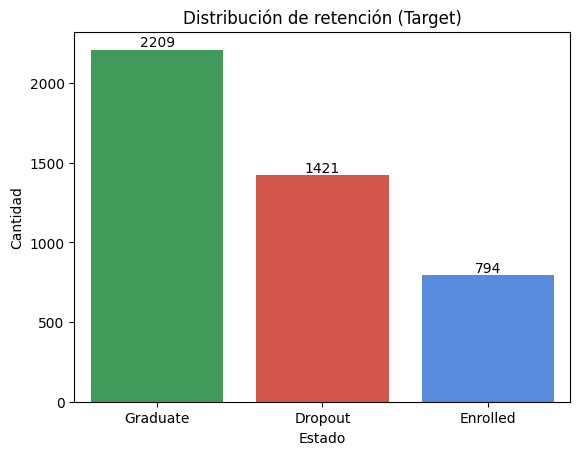

In [47]:
eje = sns.countplot(data=df_main, x='Target', hue='Target', order=df_main['Target'].value_counts().index, palette=target_palette, legend=False)
for p in eje.patches:
    height = p.get_height()
    eje.text(p.get_x() + p.get_width() / 2., height,
            '{:.0f}'.format(height),
            ha='center', va='bottom')
plt.title('Distribución de retención (Target)')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


- Graduados: 2209 estudiantes.
- Abandonos: 1421 estudiantes.
- Enrolados: 794 estudiantes.

La mayoría de los estudiantes en este dataset logran graduarse, lo cual es un indicador positivo. Sin embargo, la cantidad de abandonos es significativa **(casi el 64% de los graduados)**, lo que subraya la importancia de identificar los factores que contribuyen a este resultado. Los estudiantes enrolados representan una cohorte activa cuyo estado final aún está por determinarse.

## Distribución de género

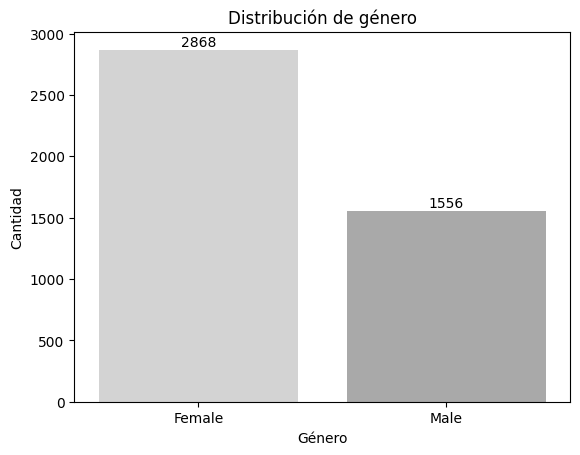

In [48]:
eje = sns.countplot(data=df_main, x='Gender', hue='Gender', order=df_main['Gender'].value_counts().index, palette=gender_palette, legend=False)
for p in eje.patches:
    height = p.get_height()
    eje.text(p.get_x() + p.get_width() / 2., height,
            '{:.0f}'.format(height),
            ha='center', va='bottom')

plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

- Mujeres: 2868 estudiantes.
- Hombres: 1556 estudiantes.

Existe una clara desproporción en la distribución por género, con una cantidad significativamente mayor de mujeres que de hombres en el dataset. Esta característica demográfica es importante para considerar en análisis posteriores donde el género pueda ser un factor influyente.

## Distribución por modo de aplicación

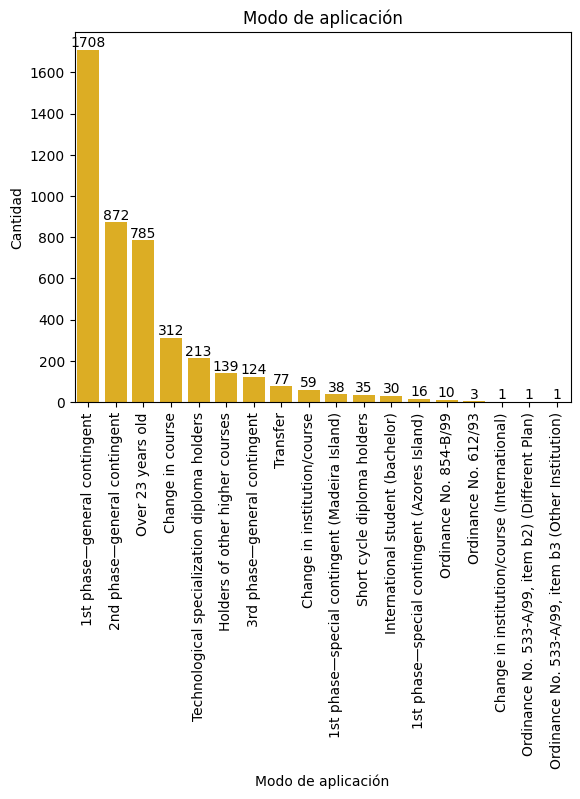

In [49]:
eje = sns.countplot(data=df_main, x='Application mode', order=df_main['Application mode'].value_counts().index, color='#FBBC05')
for p in eje.patches:
    height = p.get_height()
    eje.text(p.get_x() + p.get_width() / 2., height,
            '{:.0f}'.format(height),
            ha='center', va='bottom')

plt.title('Modo de aplicación')
plt.xlabel('Modo de aplicación')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

- 1st phase - General contingent: 1708 estudiantes.
- 2nd phase - general contingent: 872 estudiantes.
- Over 23 yrs old: 785 estudiantes.
- Change in course: 312 estudiantes.
- Tech specialization diploma holders: 213 estudiantes.
- Holders of other higher courses: 139 estudiantes.
- 3rd phase - general contingent: 124 estudiantes.
- Transfer: 77 estudiantes.
- Change in institution/course: 59 estudiantes.

**Resultados por debajo de 50 se consideraron poco relevantes**

Las fases generales (1ra y 2da) son las vías de aplicación más dominantes. Es notable que una cantidad considerable de estudiantes ingresa a través de la categoría "Over 23 yrs old", lo cual es relevante ya que la edad al inscribirse ha mostrado una correlación negativa con la retención. Otros modos de aplicación como "Change in course" o "Tech specialization diploma holders" representan vías de acceso menos frecuentes pero aún significativas.

## Distribución de edad

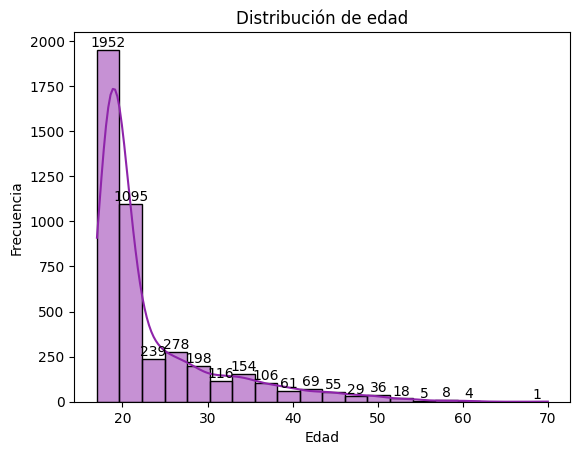

In [50]:
eje = sns.histplot(data=df_main, x='Age at enrollment', bins=20, kde=True, color='#8E24AA')
for p in eje.patches:
    height = p.get_height()
    if height > 0:
        eje.text(p.get_x() + p.get_width() / 2., height,
                '{:.0f}'.format(height),
                ha='center', va='bottom')

plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

- 18-20 años: 1952 estudiantes.
- 20-22 años: 1095 estudiantes.

El resto de los rangos de edad muestran una tendencia descendente.

La mayoría de los estudiantes se inscriben en la institución a una edad temprana, con una concentración significativa en el rango de 18 a 22 años. A medida que la edad aumenta, el número de estudiantes disminuye. Este patrón es coherente con la correlación negativa observada entre la edad al inscribirse y la retención, sugiriendo que los estudiantes de mayor edad pueden enfrentar desafíos adicionales que impactan su permanencia.

## Análisis de correlación y factores de abandono

### Correlación de variables numéricas con el estado del estudiante

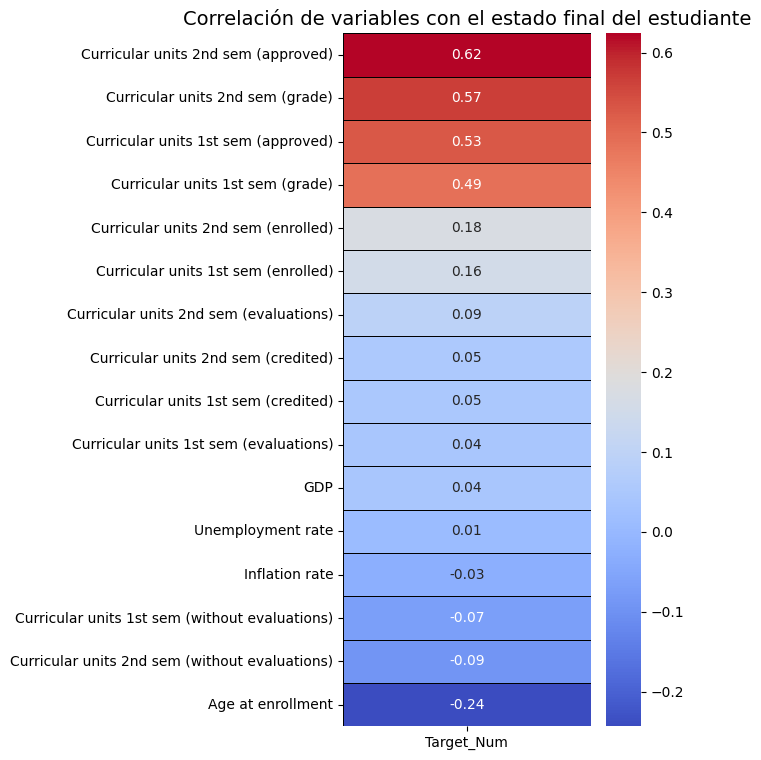

In [54]:
cols = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

df_corr = df_main[cols + ['Target_Num']].copy()
corr_target = df_corr.corr()

corr_with_target = corr_target[['Target_Num']].drop('Target_Num').sort_values(by='Target_Num', ascending=False)

plt.figure(figsize=(4, 9))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=.5, linecolor='black')
plt.title('Correlación de variables con el estado final del estudiante', fontsize=14)
plt.yticks(rotation=0)
plt.show()

### Resúmen de factores clave

In [55]:
print("\n--- Edad promedio por estado final ---")
print(df_main.groupby('Target')['Age at enrollment'].mean())

print("\n--- Promedio de unidades aprobadas 1er sem. por estado final ---")
print(df_main.groupby('Target')["Curricular units 1st sem (approved)"].mean())


--- Edad promedio por estado final ---
Target
Dropout     26.068966
Enrolled    22.369018
Graduate    21.783612
Name: Age at enrollment, dtype: float64

--- Promedio de unidades aprobadas 1er sem. por estado final ---
Target
Dropout     2.551724
Enrolled    4.318640
Graduate    6.232232
Name: Curricular units 1st sem (approved), dtype: float64


## Validación de hipotesis

### H1: Los estudiantes con padres con menor nivel educativo tienen más probabilidades de abandonar.

Pregunta de investigación: ¿Existe alguna relación entre el nivel educativo de los padres y el egreso?

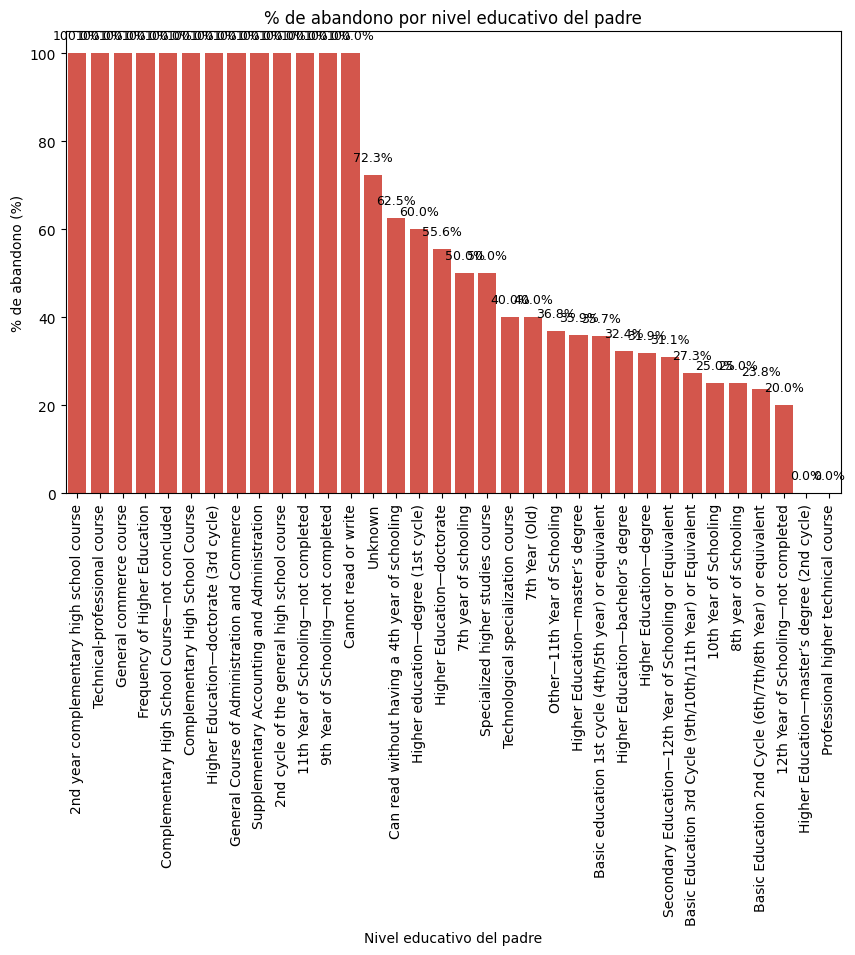

In [68]:
total_by_parent_qualification = df_main["Father's qualification"].value_counts().reset_index()
total_by_parent_qualification.columns = ["Father's qualification", 'Total Students']

dropout_by_parent_qualification = df_main[df_main['Target'] == 'Dropout']["Father's qualification"].value_counts().reset_index()
dropout_by_parent_qualification.columns = ["Father's qualification", 'Dropouts']

merged_df = pd.merge(total_by_parent_qualification, dropout_by_parent_qualification, on="Father's qualification", how='left')
merged_df['Dropouts'] = merged_df['Dropouts'].fillna(0)

merged_df['Dropout Rate (%)'] = (merged_df['Dropouts'] / merged_df['Total Students']) * 100

merged_df_sorted = merged_df.sort_values(by='Dropout Rate (%)', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_df_sorted, x="Father's qualification", y='Dropout Rate (%)', color='#EA4335')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 2.5,
            '{:.1f}%'.format(height),
            ha='center', va='bottom', fontsize=9)

plt.title('% de abandono por nivel educativo del padre')
plt.xlabel('Nivel educativo del padre')
plt.ylabel('% de abandono (%)')
plt.xticks(rotation=90)
plt.show()

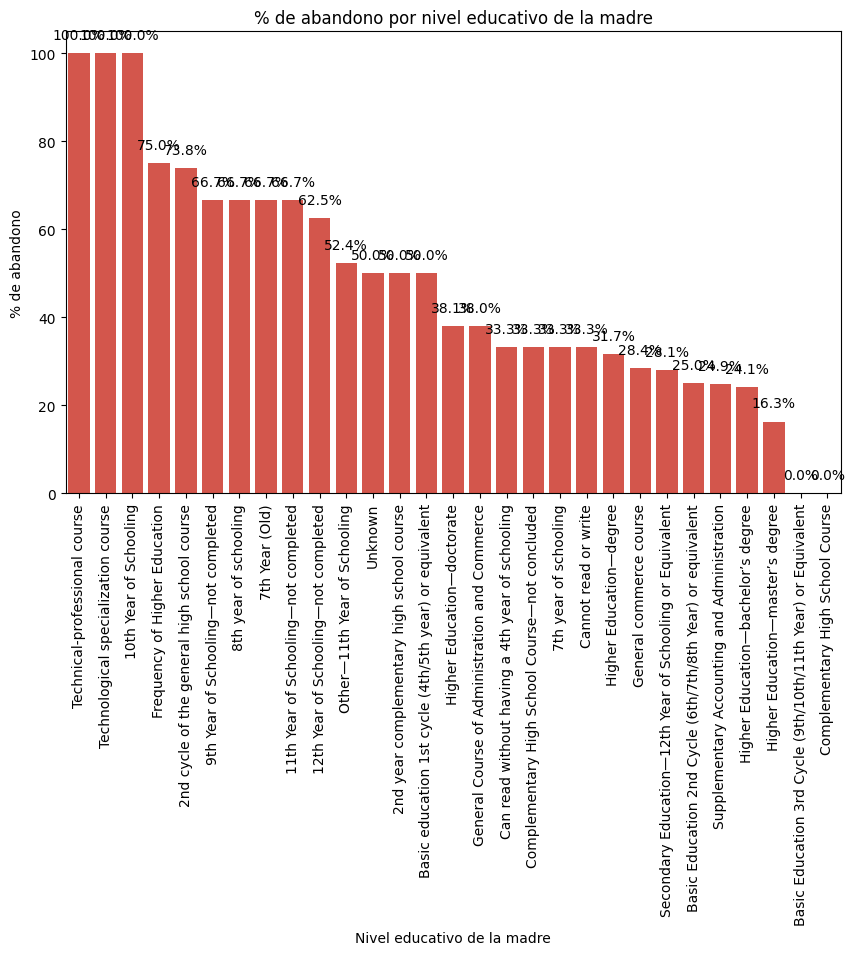

In [69]:
total_by_parent_qualification = df_main["Mother's qualification"].value_counts().reset_index()
total_by_parent_qualification.columns = ["Mother's qualification", 'Total Students']

dropout_by_parent_qualification = df_main[df_main['Target'] == 'Dropout']["Mother's qualification"].value_counts().reset_index()
dropout_by_parent_qualification.columns = ["Mother's qualification", 'Dropouts']

merged_df = pd.merge(total_by_parent_qualification, dropout_by_parent_qualification, on="Mother's qualification", how='left')
merged_df['Dropouts'] = merged_df['Dropouts'].fillna(0)

merged_df['Dropout Rate (%)'] = (merged_df['Dropouts'] / merged_df['Total Students']) * 100

merged_df_sorted = merged_df.sort_values(by='Dropout Rate (%)', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_df_sorted, x="Mother's qualification", y='Dropout Rate (%)', color='#EA4335')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 2.5,
            '{:.1f}%'.format(height),
            ha='center', va='bottom')

plt.title('% de abandono por nivel educativo de la madre')
plt.xlabel('Nivel educativo de la madre')
plt.ylabel('% de abandono')
plt.xticks(rotation=90)
plt.show()

### H2: Existen diferencias significativas en las tasas de graduación entre las distintas disciplinas o programas académicos.

Pregunta de investigación asociada: ¿El tipo de curso influye en la retención?

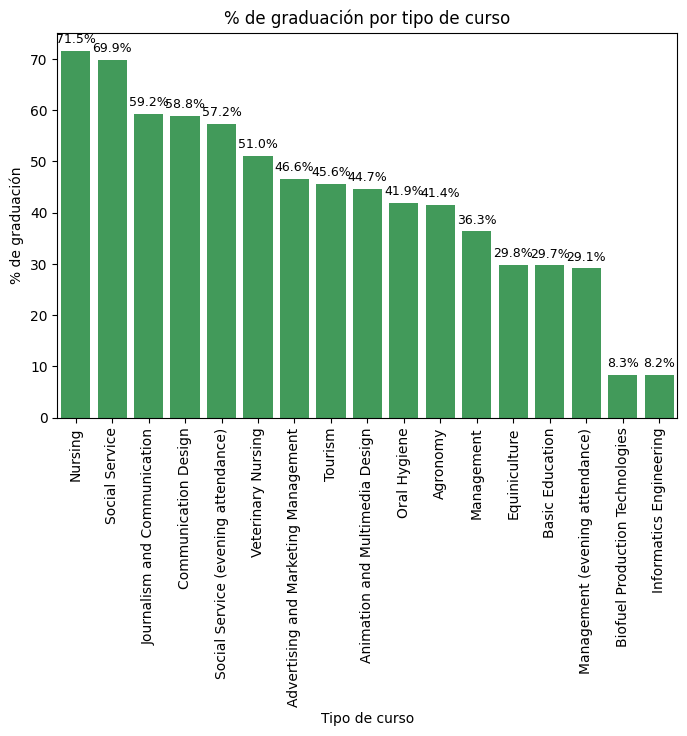

In [72]:
total_by_course_type = df_main['Course'].value_counts().reset_index()
total_by_course_type.columns = ['Course', 'Total Students']

graduates_by_course_type = df_main[df_main['Target'] == 'Graduate']['Course'].value_counts().reset_index()
graduates_by_course_type.columns = ['Course', 'Graduates']

merged_df_course = pd.merge(total_by_course_type, graduates_by_course_type, on='Course', how='left')
merged_df_course['Graduates'] = merged_df_course['Graduates'].fillna(0)

merged_df_course['Graduation Rate (%)'] = (merged_df_course['Graduates'] / merged_df_course['Total Students']) * 100

merged_df_course_sorted = merged_df_course.sort_values(by='Graduation Rate (%)', ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=merged_df_course_sorted, x='Course', y='Graduation Rate (%)', color='#34A853')

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2.,
  height + 1,
  '{:.1f}%'.format(height),
  ha='center', va='bottom', fontsize=9)

plt.title('% de graduación por tipo de curso')
plt.xlabel('Tipo de curso')
plt.ylabel('% de graduación')
plt.xticks(rotation=90)
plt.show()


### H3: La nacionalidad local (portuguesa) está asociada a mayor retención.

Pregunta de Investigación Asociada: ¿Hay diferencias por género o nacionalidad?

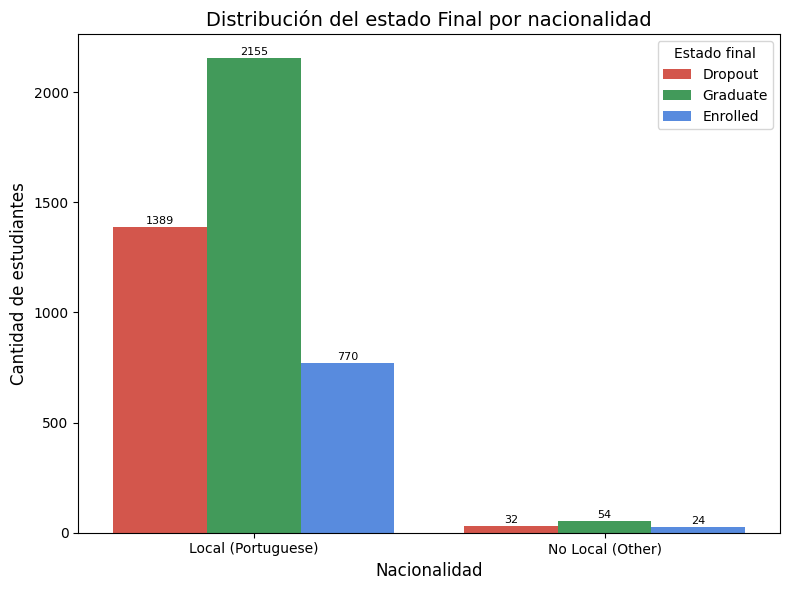


--- Tasa de graduación por nacionalidad ---
             Is_Local  Total Students  Graduates  Graduation Rate (%)
0  Local (Portuguese)            4314       2155            49.953639
1    No Local (Other)             110         54            49.090909


In [74]:
df_main['Is_Local'] = df_main['Nationality'].apply(lambda x: 'Local (Portuguese)' if x == 'Portuguese' else 'No Local (Other)')
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_main, x='Is_Local', hue='Target', palette=target_palette)
for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.text(
    p.get_x() + p.get_width() / 2.,
    height + 5,
  '{:.0f}'.format(height),
  ha='center', va='bottom', fontsize=8, color='black'
  )

plt.title('Distribución del estado Final por nacionalidad', fontsize=14)
plt.xlabel('Nacionalidad', fontsize=12)
plt.ylabel('Cantidad de estudiantes', fontsize=12)
plt.legend(title='Estado final')
plt.tight_layout()
plt.show()

total_by_local = df_main['Is_Local'].value_counts().reset_index()
total_by_local.columns = ['Is_Local', 'Total Students']

graduates_by_local = df_main[df_main['Target'] == 'Graduate']['Is_Local'].value_counts().reset_index()
graduates_by_local.columns = ['Is_Local', 'Graduates']

merged_local_df = pd.merge(total_by_local, graduates_by_local, on='Is_Local', how='left')
merged_local_df['Graduates'] = merged_local_df['Graduates'].fillna(0)
merged_local_df['Graduation Rate (%)'] = (merged_local_df['Graduates'] / merged_local_df['Total Students']) * 100

print("\n--- Tasa de graduación por nacionalidad ---")
print(merged_local_df)